In [7]:
#Imports 
import torch
import numpy as np
import matplotlib.pyplot as plt

#Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



cpu


/var/folders/y2/y9hq98q95vxbp4yyvfbkx0h00000gn/T/ipykernel_65200/3940453413.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


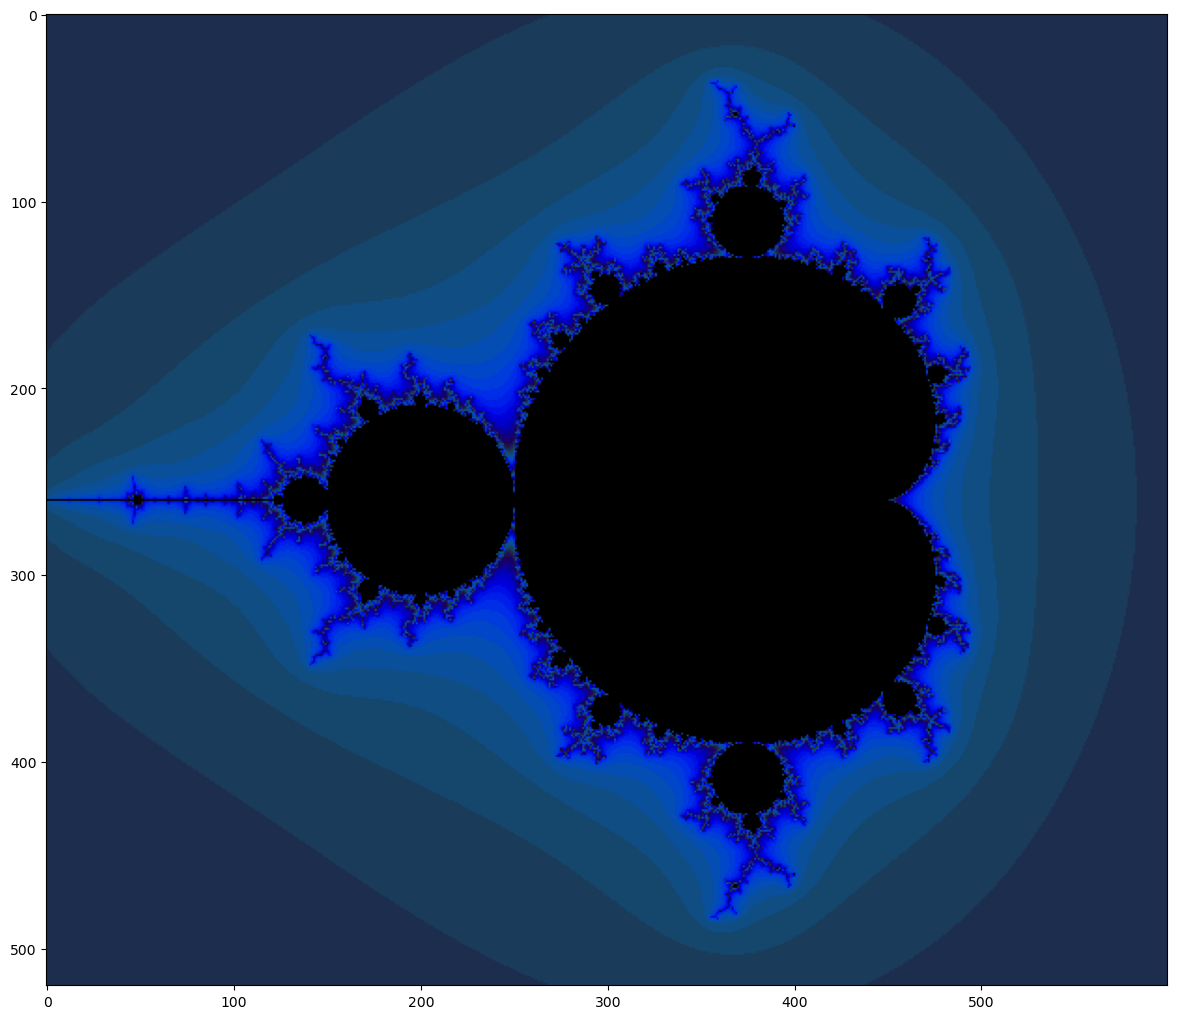

In [8]:
#2.1 
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

#load into PyTorch sensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

#transfer to GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    
    #Update Variables to Compute
    ns = ns + not_diverged
    zs = zs_

#Plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

/var/folders/y2/y9hq98q95vxbp4yyvfbkx0h00000gn/T/ipykernel_65200/4174176107.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


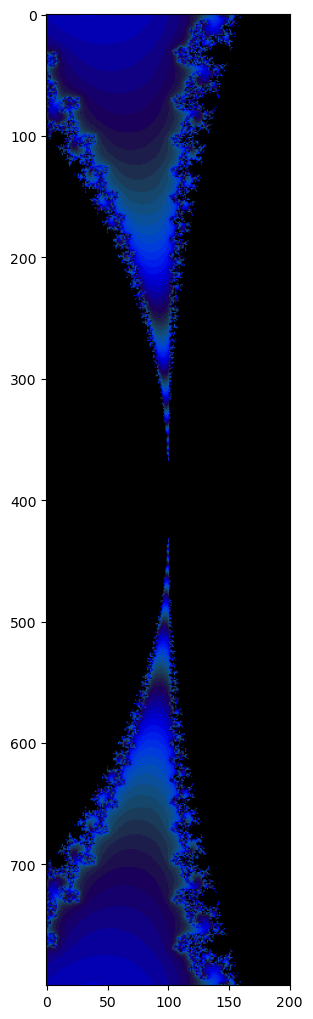

In [ ]:
#2.3 Demonstration
#Higher Resolution, Zoomed In
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]

Y, X = np.mgrid[-0.2:0.2:0.0005, -0.8:-0.7:0.0005]

#load into PyTorch sensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

#transfer to GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    
    #Update Variables to Compute
    ns = ns + not_diverged
    zs = zs_

#Plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

/var/folders/y2/y9hq98q95vxbp4yyvfbkx0h00000gn/T/ipykernel_65200/2321405384.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


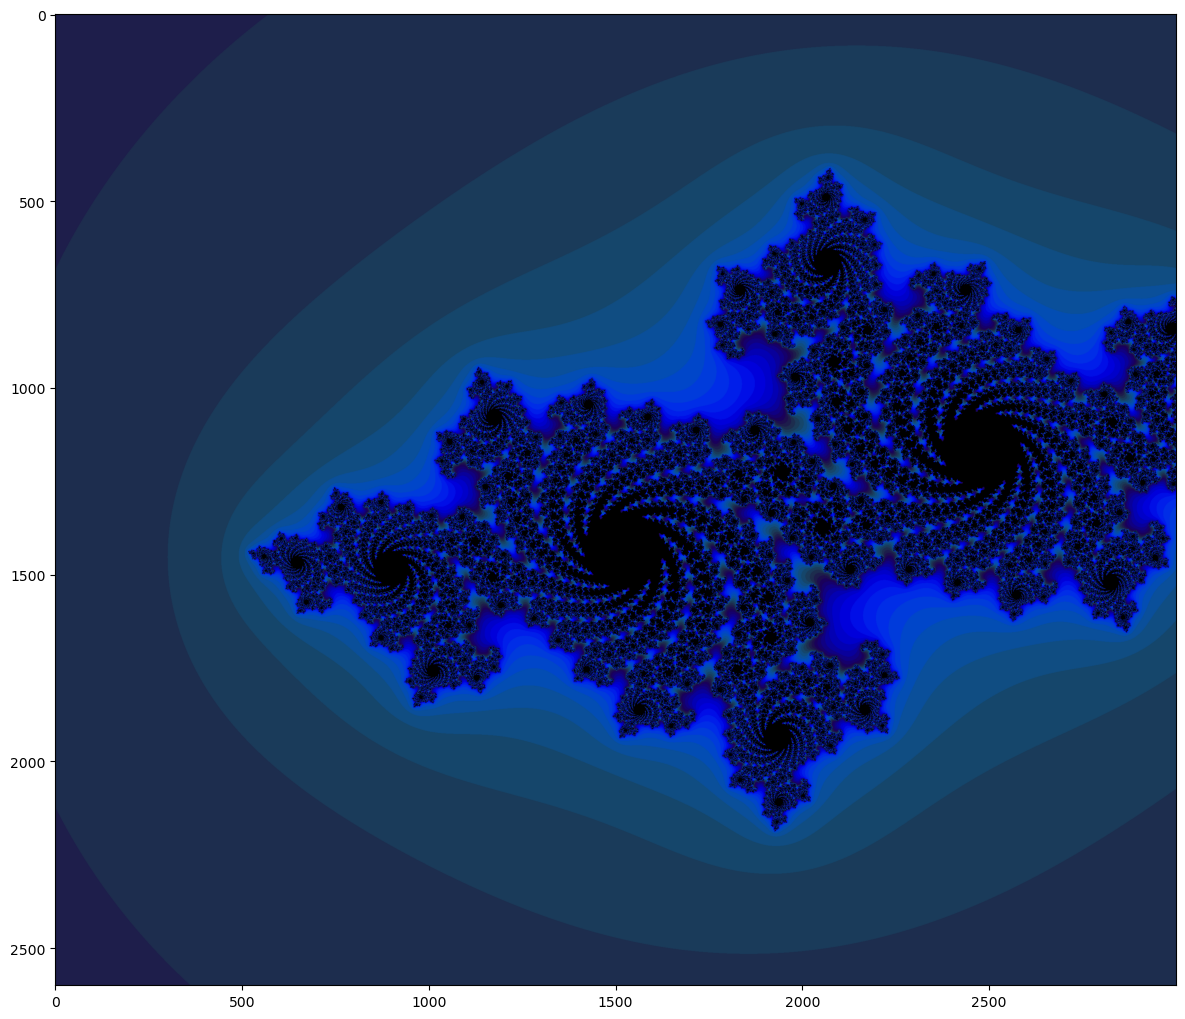

In [15]:
# 2.3 Demonstration
# Julia Set
# Use NumPy to create a 2D array of complex numbers
Y, X = np.mgrid[-1.3:1.3:0.001, -2:1:0.001]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# Julia set: start z as grid, constant c fixed
z = torch.complex(x, y)  
c = torch.complex(torch.tensor(-0.7), torch.tensor(0.27015))  # common Julia constant
ns = torch.zeros_like(z)

# Transfer to GPU device
z = z.to(device)
c = c.to(device)
ns = ns.to(device)

# Julia Set computation
for i in range(200):
    z = z * z + c
    not_diverged = torch.abs(z) < 4.0
    ns = ns + not_diverged

# Plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


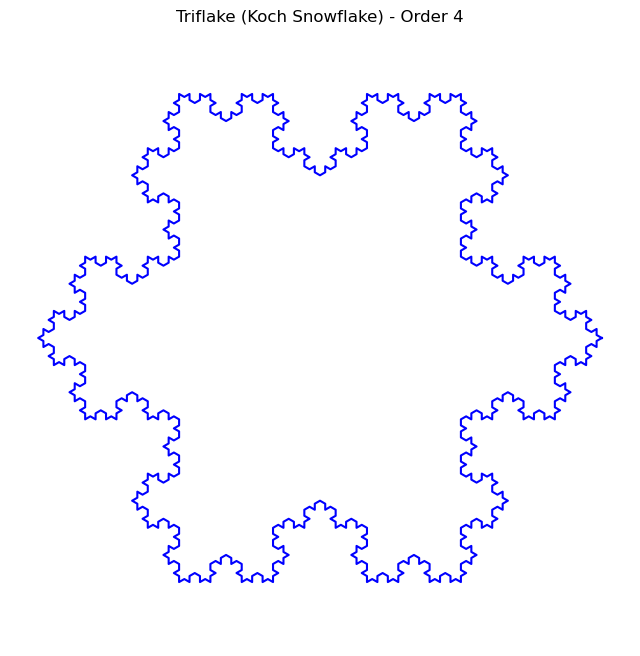

In [ ]:
#Triflake Fractal

import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order=0):
    """
    Returns x, y coordinates of Koch snowflake of given order.
    """
    # Initial equilateral triangle
    angles = np.array([0, 120, 240]) * np.pi / 180.0
    x = np.cos(angles)
    y = np.sin(angles)
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    for _ in range(order):
        new_x = []
        new_y = []
        for i in range(len(x)-1):
            # Start and end points of the segment
            x0, y0 = x[i], y[i]
            x1, y1 = x[i+1], y[i+1]
            
            # Points dividing the segment into thirds
            dx = (x1 - x0) / 3
            dy = (y1 - y0) / 3
            x_a = x0 + dx
            y_a = y0 + dy
            x_b = x0 + 2*dx
            y_b = y0 + 2*dy

            # Peak of the equilateral triangle
            angle = np.arctan2(y_b - y_a, x_b - x_a) - np.pi/3
            dist = np.sqrt(dx**2 + dy**2)
            x_peak = x_a + np.cos(angle) * dist
            y_peak = y_a + np.sin(angle) * dist

            # Append points
            new_x += [x0, x_a, x_peak, x_b]
            new_y += [y0, y_a, y_peak, y_b]
        new_x.append(x[-1])
        new_y.append(y[-1])
        x, y = np.array(new_x), np.array(new_y)

    return x, y

# --- Generate Triflake ---
order = 4  # higher = more detail
x, y = koch_snowflake(order)

# --- Plot ---
plt.figure(figsize=(8, 8))
plt.plot(x, y, color='blue')
plt.axis('equal')
plt.axis('off')
plt.title(f'Triflake (Koch Snowflake) - Order {order}')
plt.show()
